# Definition of NqueensProblem class which is the solution of the problem with genetic algorithm

In [1]:
import numpy as np

import random

class NqueensProblem():
    
    def __init__(self,n,m):#n=chess board size, m=population size
        
        self.n = n  # n * n chess board
        
        self.m = m #population size
        
        self.population = []
                
        
    def population_init(self):
        
        """The first population initialization.
        Chromosome here is actually a vector of length n, which actually is a random permutation of (1, 2, 3… n). 
        That means that i-th gen contains coordinate of the row of the queen that is located in the i-th column in chess board.
        """
        
        possible_coord = [i for i in range(self.n)]
        
        for i in range (self.m): #population size
            
            coord = random.sample(possible_coord, self.n)
            
            self.population.append(coord)
                        
        return self.population
    
      
    def fitness(self, chromosome): 
         
        '''
        Function gets chromosome as input parameter and returns fitness value for that chromosome.
        Fitness function for this problem is the number of conflicts between queens(with minus sigh to get maximization problem
        to correspond definition of fitness function of genetic algorithm.
        Because we initialize each possible solution
        the way that only one queen is located in one row and one columns conflicts can occur only in diagonals  function
        calculates the number of conflicts in diagonals.
   
         '''
        
        chromosome = self.return_matrix_form(chromosome)
        
        
        count_main_diag = np.array(list(map(np.sum,[np.diagonal(chromosome, i) for i in range(-(self.n-1),self.n)])))
        
        count_secondary_diag=np.array(list(map(np.sum,[np.diag(np.fliplr(chromosome),i) for i in range(-(self.n-1),self.n)])
                                          ))
        conflicts = -np.sum(count_main_diag*(count_main_diag-1)/2)-np.sum(count_secondary_diag*(count_secondary_diag-1)/2)
        
        if conflicts == -0:
            
            return 0
        
        return conflicts
 
    
    def population_sorted(self,population):
        
        """Function sorts individuals in generation based on their fitness values,
        returns np array which first dimenshion indicates index of the chromosome in the current population, and 
        second dimenshion is the fitness value of that chromosome"""
       
        fitness_arr = np.array(list(enumerate([self.fitness(chromosome) for chromosome in population]))) 
        
        fitness_sorted_arr = fitness_arr[fitness_arr[:, 1].argsort()]
        
        return fitness_sorted_arr
    
    
        
    def parent_selection(self,population,parent_num, method='roulette based'):
       
        "Function is intentended for parent selection with different methods "
       
        fitness_sorted_arr = self.population_sorted(population)

        if method == 'elitist': #selects cromossomes with the largest fitness values
                        
            parents_index = fitness_sorted_arr[:,0:1][-parent_num:].reshape(parent_num,)
            
        
        if method == 'roulette based': #selects chromossomes randomly based n probabili
            
            coordinates = fitness_sorted_arr[:,0]
            
            fitness_values = fitness_sorted_arr[:,1]

            probabilities = fitness_values / np.sum(fitness_values)

            parents_index = np.random.choice(coordinates,parent_num,replace=False,p=probabilities)
            
        return parents_index

            

    def crossover_one_point(self, population, parents_index, parent_count):# one point crossover
       
        """One-point crossover: In this operator, one arbitrary combination point is selected for both parents’ chromosomes.
        The chromosomic section after these combination points are swapped with each other, giving birth to two new offspring.
        Modification here is only the process of deleting not unique elements from the new offspring and filling them with random 
        permutationm of diffence of the numbers between [1...n] and unique values of offspring"""
        
        new_offsprings = []
        
        for i in range(0,len(parents_index)-1,2):
            
            parent1 = population[int(parents_index[i])] #get coordinates of parents with their indices
            
            parent2 = population[int(parents_index[i+1])]
            
            sep = int(self.n/2)  # separation point
            
            possible_coord = [i for i in range(self.n)] #possible coordinates of queens positions
             
            off1 = np.zeros((n,))
            
            off2 = np.zeros((n,))
            
            off1[0:sep] = parent1[0:sep]
            
            off1[sep:] = parent2[sep:]
            
            diff = np.setdiff1d(possible_coord,off1) # get indices that aren't present fo fill repeated coordinates
            
            not_unique_indices = np.setdiff1d(possible_coord,np.unique(off1,return_index=True)[1])
            
            off1[not_unique_indices] = diff
            
             
            off2[0:sep] = parent2[0:sep]
            
            off2[sep:] = parent1[sep:]
            
            diff = np.setdiff1d(possible_coord,off2) # get indices that aren't present fo fill repeated coordinates
            
            not_unique_indices = np.setdiff1d(possible_coord,np.unique(off2,return_index=True)[1])
            
            off2[not_unique_indices] = diff
            
            
            new_offsprings.append(list(off1.astype(int)))
            
            new_offsprings.append(list(off2.astype(int)))
            
        return new_offsprings        
    
    
    def crossover(self, population, parents_index, parent_count): 
        """Another crossover method: To create new offspring random indices are choosen and that indices of the 
        offspring are filled with the values of the first parent in corresponding indices.
        Empty indices of the offspring are filled with the random sample of the second parent """
        
        new_offsprings = []
        
        for i in range(0,len(parents_index)-1,2):
            
            parent1 = np.array(population[int(parents_index[i])])#get coordinates of parents with their indices
            
            parent2 = np.array(population[int(parents_index[i+1])])
             
            off1 = np.zeros((self.n,))
            
            off2 = np.zeros((self.n,))
            
            possible_coord = [i for i in range(self.n)] # all possible coordinates of queens positions

            fixed_index1 = np.random.choice(self.n,size=self.n//2,replace=False)  #index
            
            off1[fixed_index1] = parent1[fixed_index1]  #fill with values
            
            not_fixed_index1 = np.setdiff1d(possible_coord,fixed_index1)
            
            second_part_value = np.setdiff1d(parent2,parent1[fixed_index1]) #set dif p p
            
            np.random.shuffle(second_part_value)
            
            off1[not_fixed_index1] = second_part_value
            
            
            fixed_index2 = np.random.choice(self.n,size=self.n//2,replace=False)  #index
            
            off2[fixed_index2] = parent2[fixed_index2]  #fill with values
            
            not_fixed_index2 = np.setdiff1d(possible_coord,fixed_index2)
            
            second_part_value = np.setdiff1d(parent1,parent2[fixed_index2])
            
            np.random.shuffle(second_part_value)
            
            off2[not_fixed_index2] = second_part_value
            
            
            new_offsprings.append(list(off1.astype(int)))
            
            new_offsprings.append(list(off2.astype(int)))
            
        return new_offsprings        


    
    def mutation(self,offspring_coord,upd_num):
        """Function gets chromosome and the number of  gens that function will mutate.
        Randomly selects indices of two gens and swaps their values"""
        
        
        pairs_count = upd_num // 2
        
        possible_coordinates = [i for i in range(self.n)]
        
        for i in range (pairs_count):
            
            ind1, ind2 = random.sample(possible_coordinates, 2)
            
            possible_coordinates[ind1],possible_coordinates[ind2] = possible_coordinates[ind2], possible_coordinates[ind1]
            
            return offspring_coord
    
        
    def return_matrix_form (self, indiv_coord):
        
        """Gets coordinates as input and returns binary matrix form of chess board,
        where 1 indicates location of the queen"""
        
        indiv_coord = np.array(list(zip(np.arange(self.n), indiv_coord)))

        chromosome = np.zeros((self.n,self.n))
           
        chromosome[indiv_coord[:,0], indiv_coord[:,1]] = np.ones(chromosome[indiv_coord[:,0],indiv_coord[:,1]].shape)

        return chromosome
        
    
    def survival_selection(self, population, gap):
        
        """Selects chromosomes that must be deleted from the population, 
        gap parameter indicates number of chromosomes to be deleted"""
        
        fitness_sorted_arr = self.population_sorted(population)
        
        return fitness_sorted_arr[:gap,0]
           

# Generation loop

In [2]:
generation = 0

queens_number = 10

population_size = 200

algorithm = NqueensProblem(queens_number,population_size)

parents_num = 10  # number of parents selected for crossover

upd_num = 2 #number of genes in each cromosome updated during mutation

mutation_treshold = 0.5

population = algorithm.population_init()

fitness = -10

fitness_previous = 20


min_fitness_lst = []

fitness_repeated = 0

# to avoid premature convergence we add randomness if the same fitness value is  repeated more than specified number,

while (int(fitness) < 0 ):
    
    fitness_list = algorithm.population_sorted(population)
    
    if generation > 0:
        
        fitness_previous = fitness 
        
    fitness = fitness_list[-1,1]
    
    if fitness == fitness_previous:
        
        fitness_repeated += 1
   
    else:
        
        fitness_repeated = 0
        
        upd_num = 2
        
        mutation_treshold = 0.5
        
    if fitness_repeated > 10:
        
        upd_num = queens_number // 3
        
        parents_num = population_size // 4
        
        mutation_treshold = 0.2

        
    min_fitness_lst.append(-fitness)
        
    
    print("fitness", int(fitness))
    
    print("generation ", generation,fitness_list[-1:] ,"\n")
    
    delete_index = algorithm.survival_selection(population,parents_num)
    
    parents_index = algorithm.parent_selection(population,parents_num)
    
    offsprings_lst = algorithm.crossover(population,parents_index,parents_num)
    
    
    for i in range (len(offsprings_lst)):
        
        if np.random.uniform(0,1) > mutation_treshold:
            
            print("mutation on new created offspring NO", i)
            
            offsprings_lst[i] = algorithm.mutation(offsprings_lst[i],upd_num)
            
        population[int(delete_index[i])] = offsprings_lst[i]
        
    generation+=1
    
              
    if (generation == 5000):
                
        print("Couldn't be able to find solution, but found example of coordinates which gives only",-fitness,"accidents")
        
        break
if fitness == 0:
    
    print("\n Solution found in", generation, "th generation")
    
    print("\n Coordinates of queens on board in found solution \n")
    
    print(population[int(fitness_list[-1,0])])
    

    

fitness -2
generation  0 [[136.  -2.]] 

mutation on new created offspring NO 0
mutation on new created offspring NO 1
mutation on new created offspring NO 2
mutation on new created offspring NO 4
mutation on new created offspring NO 5
mutation on new created offspring NO 7
mutation on new created offspring NO 9
fitness -2
generation  1 [[168.  -2.]] 

mutation on new created offspring NO 2
mutation on new created offspring NO 3
mutation on new created offspring NO 6
mutation on new created offspring NO 9
fitness -2
generation  2 [[34. -2.]] 

mutation on new created offspring NO 1
mutation on new created offspring NO 3
mutation on new created offspring NO 4
mutation on new created offspring NO 5
mutation on new created offspring NO 6
mutation on new created offspring NO 7
mutation on new created offspring NO 9
fitness -2
generation  3 [[136.  -2.]] 

mutation on new created offspring NO 0
mutation on new created offspring NO 1
mutation on new created offspring NO 2
mutation on new cre

# Results of genetic algorithm

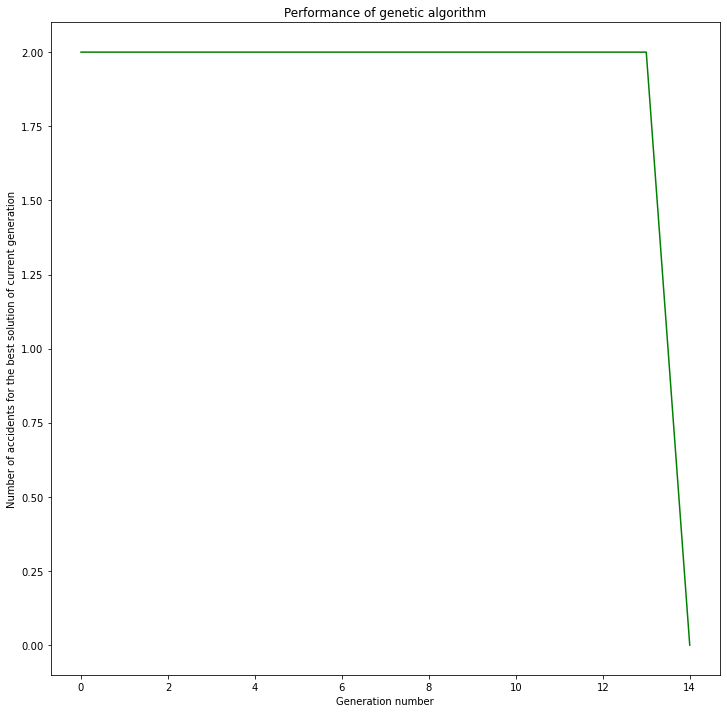

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
generations = range(0,generation)
plt.plot(min_fitness_lst, 'g')
plt.title('Performance of genetic algorithm')
plt.xlabel('Generation number')
plt.ylabel('Number of accidents for the best solution of current generation')
plt.show()